Part 1: Importing Libraries

This section imports the necessary libraries for downloading data, forecasting, manipulating data, and visualizing results.



In [12]:
# Part 1: Importing Libraries
# Import required libraries for data handling, forecasting, and visualization.
import yfinance as yf           # Library for downloading historical exchange rate data
import pandas as pd              # Pandas for data manipulation and analysis
from prophet import Prophet      # Prophet model for time series forecasting
import matplotlib.pyplot as plt  # Matplotlib for plotting results
from datetime import datetime    # DateTime to get the current date

Part 2: Download Historical Exchange Rate Data

Here, we download the historical exchange rate data for USD/TRY from Yahoo Finance.



In [13]:
# Part 2: Download Historical Exchange Rate Data
# Download the historical exchange rate data for USD/TRY from Yahoo Finance.
# We define the start and end dates to capture a broad range of data.
end_date = datetime.now().strftime('%Y-%m-%d')   # Set the end date dynamically to today
data = yf.download("USDTRY=X", start="2020-01-01", end=end_date)  # Download data from 2020 to today

[*********************100%***********************]  1 of 1 completed


Part 3: Data Preparation

In this section, we prepare the data by renaming the columns and resetting the index for better accessibility. We also handle outliers to stabilize the forecast.



In [14]:
# Part 3: Data Preparation
# Prophet requires specific column names, so we rename columns and reset the index.
df = data[['Close']].reset_index()         # Select only the 'Close' column and reset index for easy access
df.columns = ['ds', 'y']                   # Rename columns: 'ds' (date) and 'y' (exchange rate value)

# Handle outliers: Extreme values could skew predictions, so we limit the 'Close' values to the 99th percentile.
df['y'] = df['y'].apply(lambda x: min(x, df['y'].quantile(0.99)))  # Filter out extreme values


Part 4: Adding Holidays or Special Events

This section adds important dates, such as Federal Reserve meeting dates, to help the model understand potential impacts on the exchange rate.



In [15]:
# Part 4: Adding Holidays or Special Events
# Adding special events, like Federal Reserve meeting dates, as holidays to improve the model's awareness.
# These dates may impact the USD/TRY exchange rate, providing a more accurate forecast.
us_holidays = pd.DataFrame({
    'holiday': 'Fed_meeting',                      # Label the event as "Fed_meeting"
    'ds': pd.to_datetime(['2023-01-25', '2023-03-22', '2023-05-03', '2023-06-14']),  # Dates of Fed meetings
    'lower_window': 0,                             # Start the event window on the day of the meeting
    'upper_window': 1                              # End the event window one day after the meeting
})


Part 5: Initialize and Customize Prophet Model

We set up the Prophet model with specific configurations to capture seasonality and the effects of holidays.

In [16]:
# Part 5: Initialize and Customize Prophet Model
# Setting Prophet model parameters with customizations for better seasonality detection and event effects.
model = Prophet(
    seasonality_mode='multiplicative',   # 'multiplicative' yerine 'additive' deneyin
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    holidays=us_holidays
)



Part 6: Training the Model

Here, we fit the Prophet model using the prepared historical data.



In [17]:
# Part 6: Training the Model
# Train the Prophet model using the prepared historical data to recognize patterns.
model.fit(df)  # Fit the model with the preprocessed USD/TRY data


15:13:23 - cmdstanpy - INFO - Chain [1] start processing
15:13:24 - cmdstanpy - INFO - Chain [1] done processing


Part 7: Forecasting for the Next Week

This section extends the data frame to create future dates and generates predictions for the next week.

In [18]:
# Part 7: Forecasting for the Next Week
# Extend the DataFrame for a 1-week forecast and use Prophet to generate predictions.
future = model.make_future_dataframe(periods=7)  # Create future dates for the next 7 days
forecast = model.predict(future)                 # Predict USD/TRY rates for the future dates


Part 8: Plotting the Forecast Results

Here, we visualize the forecasted results alongside the historical data to better understand the predictions.

c:\Users\berat\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\berat\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


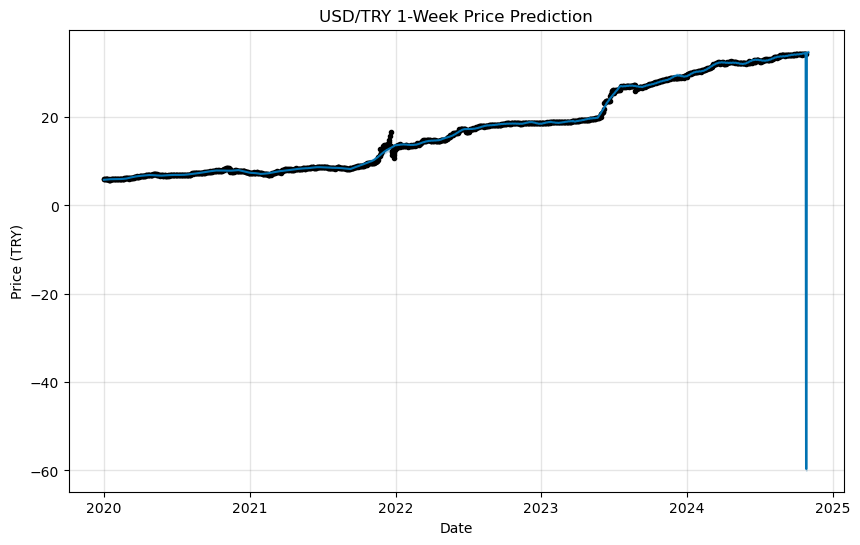

In [19]:
# Part 8: Plotting the Forecast Results
# Visualize the forecasted results alongside historical data.
fig, ax = plt.subplots(figsize=(10, 6))          # Set up figure and axes for plot
model.plot(forecast, ax=ax)                      # Use Prophet's default plot for forecasted data
plt.title("USD/TRY 1-Week Price Prediction")     # Add title for context
plt.xlabel("Date")                               # Label the x-axis as 'Date'
plt.ylabel("Price (TRY)")                        # Label the y-axis as 'Price (TRY)'
plt.show()                                       # Display the plot


Part 9: Plotting Seasonal Components

This section visualizes the individual components of the forecast, such as trend and seasonality

c:\Users\berat\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\berat\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\berat\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

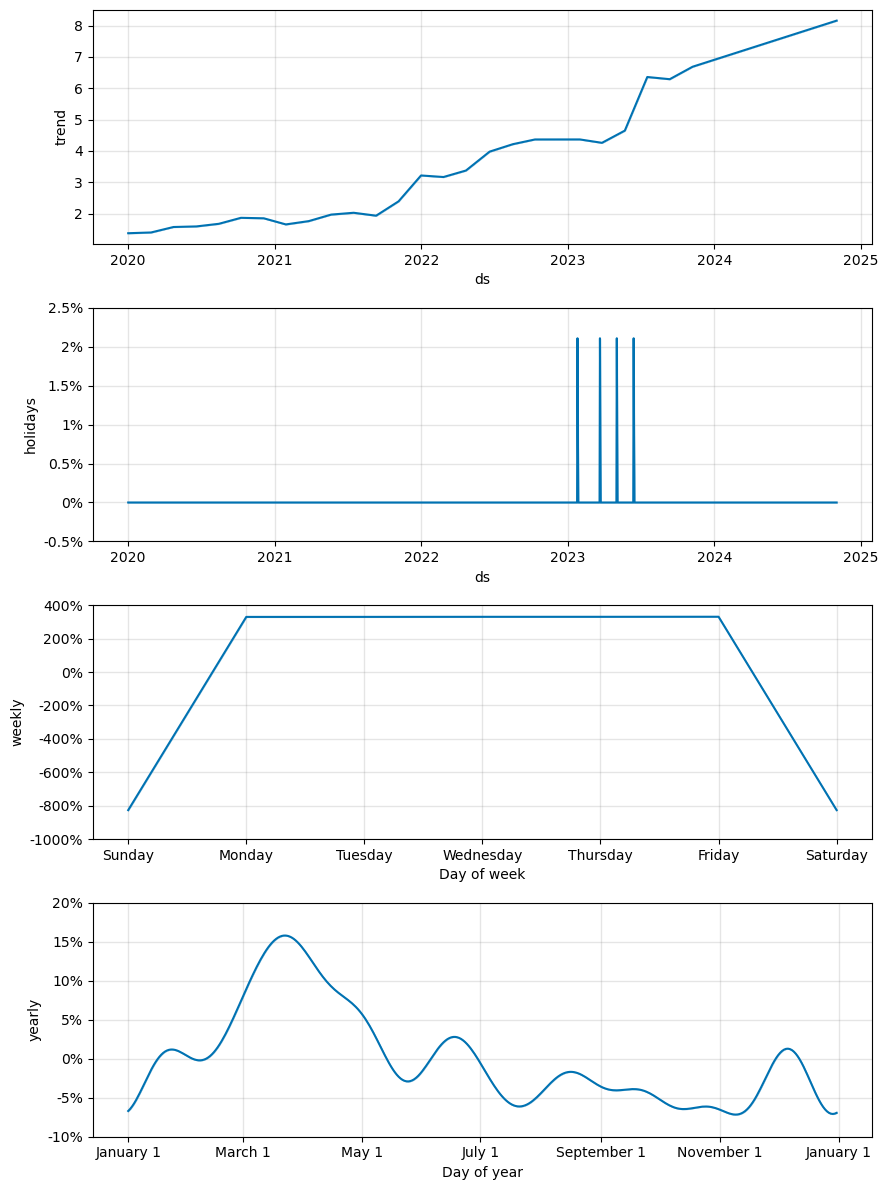

In [20]:
# Part 9: Plotting Seasonal Components
# Display individual components (trend, yearly seasonality, weekly seasonality) for deeper insights.
fig2 = model.plot_components(forecast)           # Use Prophet's component plot for trends and seasonality
plt.show()                                       # Display seasonal components


Part 10: Displaying the Forecasted Results

Here, we summarize the forecasted values and their confidence intervals.



In [21]:
# Part 10: Displaying the Forecasted Results
# Display forecasted values and confidence intervals for the upcoming week in a readable format.
forecast_summary = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
print("1-Week Forecast (USD/TRY Exchange Rate):")
print(forecast_summary)


1-Week Forecast (USD/TRY Exchange Rate):
             ds       yhat  yhat_lower  yhat_upper
1257 2024-10-26 -59.607318  -59.995283  -59.184987
1258 2024-10-27 -59.640028  -60.055233  -59.240395
1259 2024-10-28  34.520636   34.124008   34.950915
1260 2024-10-29  34.547307   34.105731   34.932789
1261 2024-10-30  34.591147   34.162071   35.021855
1262 2024-10-31  34.604275   34.188603   35.014041
1263 2024-11-01  34.644596   34.234166   35.030637


Part 11: Compare Forecasts with Actual Close Prices for the Last 7 Days

Finally, we compare the actual closing prices from the last week with the predicted values to evaluate model performance.



In [24]:
# Part 11: Compare Forecasts with Actual Close Prices for the Last 5 Days
# For deeper insight, print a table comparing actual close prices vs. predicted values for the last 5 days.
actual_last_week = df[df['ds'] >= (df['ds'].max() - pd.Timedelta(days=4))]  # Select the last 5 days of actual data

# Check the number of actual data points
print("Actual Last Week Data:")
print(actual_last_week)
print("Number of Actual Days:", len(actual_last_week))

# Adjusted to proceed with 5 actual data points
if len(actual_last_week) >= 5:
    comparison_df = pd.DataFrame({
        'Date': actual_last_week['ds'],               # Last 5 days' dates
        'Actual Close': actual_last_week['y'],        # Actual closing prices
        'Predicted Close': forecast['yhat'].tail(5).values,  # Predicted prices
        'Lower Bound': forecast['yhat_lower'].tail(5).values,  # Lower bound of the forecast
        'Upper Bound': forecast['yhat_upper'].tail(5).values   # Upper bound of the forecast
    })

    # Display a comparison table for better evaluation of model performance
    print("Comparison of Actual and Predicted Close Prices for the Last 5 Days:")
    print(comparison_df)
else:
    print("Not enough actual data points for comparison.")


Actual Last Week Data:
             ds          y
1252 2024-10-21  34.214031
1253 2024-10-22  34.214031
1254 2024-10-23  34.214031
1255 2024-10-24  34.214031
1256 2024-10-25  34.214031
Number of Actual Days: 5
Comparison of Actual and Predicted Close Prices for the Last 5 Days:
           Date  Actual Close  Predicted Close  Lower Bound  Upper Bound
1252 2024-10-21     34.214031        34.520636    34.124008    34.950915
1253 2024-10-22     34.214031        34.547307    34.105731    34.932789
1254 2024-10-23     34.214031        34.591147    34.162071    35.021855
1255 2024-10-24     34.214031        34.604275    34.188603    35.014041
1256 2024-10-25     34.214031        34.644596    34.234166    35.030637
